### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy
from scipy.stats import zscore
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
dt=pd.read_csv("vehicle.csv")

dt.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
319,102,51.0,NaN,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus
20,84,47.0,75.0,153.0,64.0,6,154.0,43.0,19.0,145,175.0,354.0,184.0,75.0,0.0,3.0,185.0,192,bus
662,87,41.0,66.0,140.0,58.0,6,148.0,46.0,19.0,136,164.0,318.0,178.0,79.0,19.0,2.0,181.0,185,car
585,85,35.0,64.0,129.0,57.0,6,116.0,57.0,17.0,125,138.0,200.0,123.0,65.0,1.0,23.0,196.0,203,van
433,85,42.0,70.0,130.0,56.0,7,150.0,45.0,19.0,145,177.0,328.0,172.0,82.0,10.0,14.0,181.0,185,bus
281,82,43.0,73.0,154.0,65.0,7,151.0,44.0,19.0,143,178.0,341.0,160.0,76.0,5.0,11.0,185.0,189,bus
557,86,40.0,66.0,138.0,59.0,4,137.0,49.0,18.0,133,162.0,279.0,151.0,74.0,6.0,14.0,186.0,190,car
55,94,36.0,66.0,151.0,61.0,8,133.0,50.0,18.0,135,154.0,265.0,119.0,62.0,9.0,3.0,201.0,208,van
655,86,35.0,44.0,110.0,54.0,2,119.0,57.0,17.0,121,139.0,208.0,137.0,90.0,6.0,1.0,180.0,183,van
28,102,45.0,85.0,193.0,64.0,6,192.0,33.0,22.0,146,217.0,570.0,163.0,76.0,6.0,7.0,195.0,193,bus


In [4]:
dt.dropna(inplace=True)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
hy=dt['class'].value_counts()
ex=dt['class'].unique()
hy

car    413
bus    205
van    195
Name: class, dtype: int64

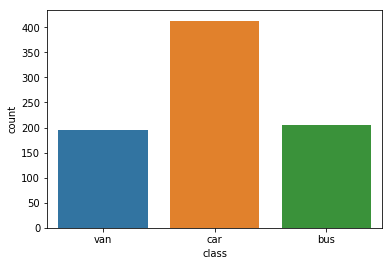

In [6]:
sns.countplot(x ='class',data=dt);

In [7]:
dt=dt.drop(['class'],axis=1)
dt = dt.apply(pd.to_numeric, errors='ignore')
dt.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
dtype: object

### Check for any missing values in the data 

In [8]:
dt.isnull().values.any()

False

### 3. Standardize the data 

In [9]:
dt_z=zscore(dt)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [10]:
distortion=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [11]:
from scipy.spatial.distance import cdist
clusters=range(1,10)

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [12]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dt)
    #print(k)
    #print(model.cluster_centers_)
    prediction=model.predict(dt)
    distortion.append(sum(np.min(cdist(dt, model.cluster_centers_, 'euclidean'), axis=1)) / dt.shape[0])
   # print(meanDistortions)

### 6. Plotting Elbow/ Scree Plot

Text(0.5,1,'Selecting k with the Elbow Method')

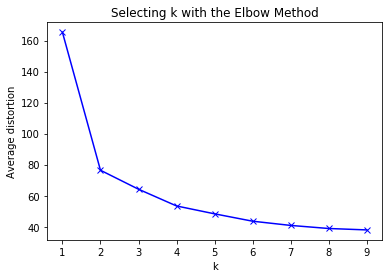

In [13]:
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [14]:
## The optimal value for K from above Elbow chart is 2 since the curve takes a steep change there

In [15]:
final_model=KMeans(2)
final_model.fit(dt)
prediction=final_model.predict(dt)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [16]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(dt)
kmeans.cluster_centers_

array([[ 97.96031746,  46.5952381 ,  93.16666667, 198.28571429,
         64.02380952,   8.5952381 , 187.23015873,  35.12698413,
         21.88095238, 149.92063492, 207.4047619 , 529.33333333,
        183.03968254,  68.26984127,   6.04761905,  13.57142857,
        193.07936508, 200.08730159],
       [104.41666667,  53.40555556, 102.88888889, 201.16111111,
         61.82222222,   9.85555556, 219.15      ,  30.45555556,
         24.56666667, 167.6       , 231.47777778, 712.17222222,
        215.31111111,  72.92777778,   7.33888889,  16.2       ,
        187.62222222, 196.06666667],
       [ 87.82424242,  38.2969697 ,  63.86060606, 133.23636364,
         57.27272727,   6.69090909, 130.26666667,  51.6969697 ,
         17.78787879, 133.35151515, 151.73939394, 251.73333333,
        140.88484848,  72.55151515,   6.36363636,  11.39393939,
        188.42424242, 193.53939394],
       [ 89.22222222,  42.75438596,  75.74561404, 158.77192982,
         63.09356725,   8.85964912, 153.5380117 ,  43.526

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [17]:
dt1=kmeans.cluster_centers_

Hint: Use pd.Dataframe function 

In [18]:
s=[dt,dt1]

In [19]:
f=pd.DataFrame(dt1,columns=dt.columns)
f

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,97.960317,46.595238,93.166667,198.285714,64.023810,8.595238,187.230159,35.126984,21.880952,149.920635,207.404762,529.333333,183.039683,68.269841,6.047619,13.571429,193.079365,200.087302
1,104.416667,53.405556,102.888889,201.161111,61.822222,9.855556,219.150000,30.455556,24.566667,167.600000,231.477778,712.172222,215.311111,72.927778,7.338889,16.200000,187.622222,196.066667
2,87.824242,38.296970,63.860606,133.236364,57.272727,6.690909,130.266667,51.696970,17.787879,133.351515,151.739394,251.733333,140.884848,72.551515,6.363636,11.393939,188.424242,193.539394
3,89.222222,42.754386,75.745614,158.771930,63.093567,8.859649,153.538012,43.526316,19.298246,143.786550,176.359649,350.824561,165.502924,73.570175,5.938596,11.137427,188.450292,195.002924


### Use kmeans.labels_ function to print out the labels of the classes

In [20]:
print(kmeans.labels_)

[3 3 1 3 3 3 2 2 2 2 3 3 0 1 2 0 1 3 2 3 3 1 3 2 1 0 3 3 2 2 1 3 3 3 1 3 1
 2 3 3 1 3 2 3 3 3 2 3 1 3 1 2 0 3 1 2 0 2 2 3 0 3 1 3 0 1 0 2 3 0 0 3 3 1
 2 3 3 1 3 2 0 2 1 3 0 3 3 1 3 3 0 3 3 3 2 2 0 0 3 3 0 3 3 3 2 3 3 0 1 0 2
 3 3 2 3 3 3 3 3 0 0 3 0 2 1 3 3 2 2 3 3 1 3 3 1 3 3 3 2 0 0 3 1 3 1 3 2 3
 2 0 3 2 1 1 3 1 3 2 1 1 3 1 3 3 0 3 2 1 2 3 2 0 0 3 3 1 3 0 3 1 3 3 1 3 3
 3 3 3 1 1 2 3 3 3 1 0 2 3 1 2 3 1 3 2 1 3 3 2 3 1 2 1 3 2 2 3 1 2 3 3 1 3
 3 3 3 1 3 2 3 3 1 2 1 3 3 3 1 3 3 0 1 2 0 2 2 0 3 3 2 2 3 0 3 1 3 3 2 1 3
 0 3 3 1 3 3 0 2 2 3 3 2 1 3 0 2 0 0 1 3 3 2 3 3 1 1 0 0 3 3 0 3 2 2 0 2 1
 1 3 0 3 3 0 3 3 3 0 1 3 1 1 3 1 3 3 3 2 2 1 1 1 3 3 2 0 3 3 3 0 0 3 1 3 0
 1 0 3 3 3 0 3 2 3 3 0 3 3 2 1 1 2 2 1 2 1 3 1 2 3 0 3 3 1 3 2 3 3 0 3 3 3
 2 1 3 1 2 0 3 2 3 3 3 3 2 3 2 3 1 3 3 3 2 1 2 3 0 2 1 3 1 2 1 1 3 3 1 2 2
 3 0 0 0 3 2 0 1 3 0 1 1 3 3 3 3 3 0 3 2 3 1 0 2 0 3 3 0 3 3 1 2 2 1 1 1 3
 1 1 3 0 3 1 1 3 2 3 3 1 3 3 1 1 3 3 1 1 3 3 2 1 1 1 2 3 0 1 1 3 3 1 3 3 1
 3 2 2 3 1 3 2 0 2 3 1 3 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [21]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [22]:
c

array([[10.43356095, 22.94598273],
       [ 8.43028104, 20.47602916],
       [10.88200378, 22.43407863],
       [ 9.31173735, 15.88936662],
       [ 9.6834281 , 18.83931892],
       [12.40663057, 20.91305376],
       [ 5.89257682, 18.23364695],
       [ 9.93561806, 20.15759791],
       [11.44881866, 18.47986226],
       [ 8.52993775, 24.30202477],
       [10.38415533, 17.14489638],
       [ 8.84565913, 20.27758165],
       [ 8.0655235 , 19.29074403],
       [ 8.30591928, 17.54689164],
       [ 8.49191668, 21.42304218],
       [13.20449437, 22.06516945],
       [10.48603911, 22.51025979],
       [ 9.69248336, 21.07656578],
       [10.49361367, 21.94255555],
       [ 8.78576264, 20.3878328 ],
       [ 7.60559699, 18.41450678],
       [11.67559531, 18.32483886],
       [11.04761222, 23.55394165],
       [ 7.98131315, 19.36784104],
       [10.21943596, 18.49962106],
       [11.89631029, 19.74322627],
       [11.3774352 , 21.56238425],
       [ 9.63650689, 23.76295938],
       [ 9.63286508,

### 9. Combine all three arrays a,b,c into a dataframe

In [23]:
A=pd.DataFrame(a)
B=pd.DataFrame(b)
C=pd.DataFrame(c)
dt1=pd.concat((A,B,C),axis=1)
dt1.head()


,0,1,0,1,0,1
0,7.839975,-0.960174,-0.442173,18.724737,10.433561,22.945983
1,5.049283,-1.419784,0.725789,18.434050,8.430281,20.476029
2,11.322270,-2.119786,0.155190,22.280175,10.882004,22.434079
3,12.092183,1.208608,2.063958,20.683566,9.311737,15.889367
4,9.576496,-0.246476,0.226709,19.526803,9.683428,18.839319


### 10. Use scatter matrix to print all the 3 distributions

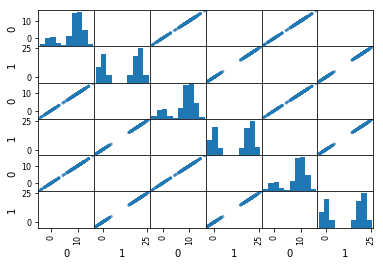

In [24]:
pd.plotting.scatter_matrix(dt1,alpha=0.4);

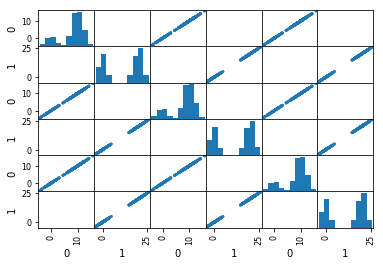

In [25]:
pd.plotting.scatter_matrix(dt1,alpha=0.8);

### 11. Find out the linkage matrix

In [26]:
from sklearn.cluster import AgglomerativeClustering 

In [27]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [28]:
dt1.dropna(inplace=True)


In [29]:
model.fit(dt1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x00000056DEA8A598>)

Use ward as linkage metric and distance as Eucledian

In [30]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage,fcluster
from scipy.spatial.distance import pdist

In [31]:
Z = linkage(dt1, 'ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(dt1))

c

0.471709483050728

### 12. Plot the dendrogram for the consolidated dataframe

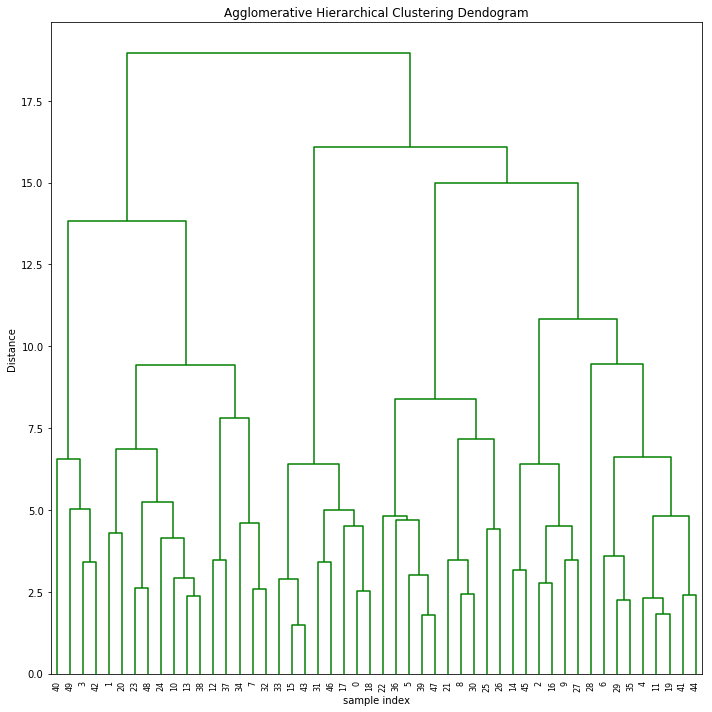

In [32]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

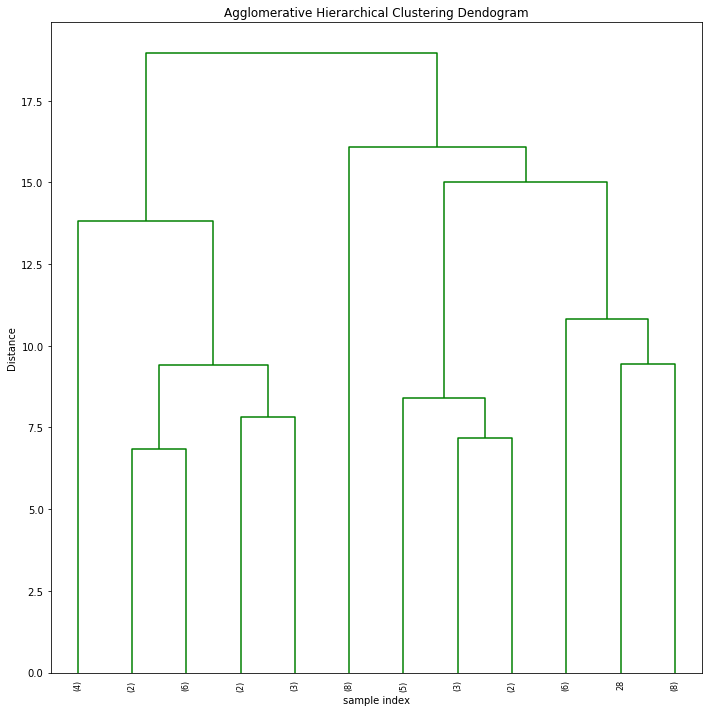

In [33]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=12,truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [34]:
## we can take 12.5 as the optimal value for 4 clustering based truncated dendogram

In [35]:
t=12.5

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [49]:
fc=fcluster(Z,t,criterion='distance')

### Use matplotlib to visually observe the clusters in 2D space 

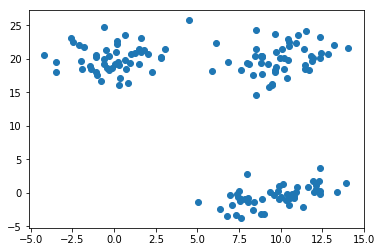

In [51]:
plt.scatter(dt1[0],dt1[1])